#### imports

In [25]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

#### create quantum circuit

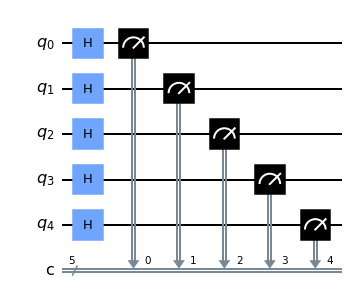

In [26]:
# Get # of qubits for quantum circuit
def get_qubits():
    n = int(input('Chose how many qubits to include in the quantum circuit (limit: 5) -> '))
    
    if n > 6:
        get_qubits()
    else:
        return n


n_qubits = get_qubits()

qc = QuantumCircuit(n_qubits, n_qubits)

for i in range(n_qubits):
    qc.h(i)

qc.measure(range(n_qubits), range(n_qubits))

qobj = assemble(qc)

qc.draw(output='mpl')

#### run on simulator

In [32]:
simulator = Aer.get_backend('qasm_simulator')

result = execute(qc, simulator, shots=1, memory=True).result()
state = result.get_memory(qc)[0]

print('statevector ->', state)

statevector -> 11111


#### show number produced.

In [33]:
def convert(state):

    decimal, exponent  = (0, 1)

    for bit in state:
        decimal += int(bit) * (1/2) ** exponent
        exponent += 1
    
    return decimal

print(convert(state))


0.96875
